# Movie Recommendation System(NLP)
Identify a list of movie recommendations, which contains at least one that the user will start watching as their next selection.If user select a movie it will recommend the five other movies which is similar to that movie.

# Dataset Link: https://www.kaggle.com/tmdb/tmdb-movie-metadata

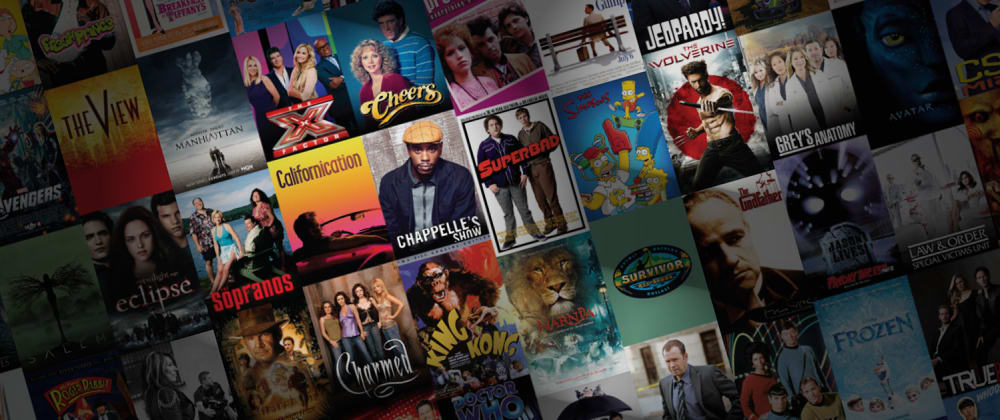

In [ ]:
from IPython.display import Image
Image(filename='/content/tmdb image.jpg') 

## Importing Necessary **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity




## Importing the dataset

In [ ]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [ ]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## Combining the two dataset

In [ ]:
movies=movies.merge(credits, on='title')

In [ ]:
movies.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

## Taking important columns

In [ ]:
movies=movies[['movie_id','genres','overview','keywords','title','cast','crew']]

In [ ]:
movies.isna().sum()

movie_id    0
genres      0
overview    3
keywords    0
title       0
cast        0
crew        0
dtype: int64

In [ ]:
movies.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ast.literal_eval - 
### This can be used for safely evaluating strings containing Python values from untrusted sources without the need to parse the values oneself. It is not capable of evaluating arbitrarily complex expressions, for example involving operators or indexing.

In [ ]:
def converter(obj):
  l=[]
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l

In [ ]:
movies.genres=movies.genres.apply(converter)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
movies.genres[0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [ ]:
movies.keywords

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4804    [{"id": 5616, "name": "united states\u2013mexi...
4805                                                   []
4806    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4807                                                   []
4808    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4806, dtype: object

In [ ]:
movies.keywords=movies.keywords.apply(converter)

In [ ]:
movies.keywords[0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [ ]:
movies.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
def converter2(obj):
  l=[]
  add=0
  for i in ast.literal_eval(obj):
    if add < 3:
      l.append(i['name'])
      add = add + 1
    else:
      break
  return l

In [ ]:
movies.cast=movies.cast.apply(converter2)

In [ ]:
movies.cast[0]

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [ ]:
movies.head(1)

,movie_id,genres,overview,keywords,title,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
movies.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

## Extracting Director name

In [ ]:
def director(obj):
  l=[]
  for i in ast.literal_eval(obj):
    if i['job']== 'Director':
      l.append(i['name'])
      break
  return l

In [ ]:
movies.crew=movies.crew.apply(director)

In [ ]:
movies.crew[0]

['James Cameron']

In [ ]:
def Converter3(string):
    l = list(string.split(" "))
    return l

In [ ]:
movies.overview=movies.overview.apply(Converter3)

In [ ]:
movies.head(1)

,movie_id,genres,overview,keywords,title,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


## Removing the spaces

In [ ]:
movies.genres=movies.genres.apply(lambda x: [i.replace(' ','') for i in x])

In [ ]:
movies.genres[0]

['Action', 'Adventure', 'Fantasy', 'ScienceFiction']

In [ ]:
movies.keywords=movies.keywords.apply(lambda x: [i.replace(' ','') for i in x])
movies.cast=movies.cast.apply(lambda x: [i.replace(' ','') for i in x])
movies.crew=movies.crew.apply(lambda x: [i.replace(' ','') for i in x])

In [ ]:
movies.head(1)

,movie_id,genres,overview,keywords,title,cast,crew
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [ ]:
movies['information']=movies['overview'] + movies['genres'] + movies['cast'] + movies['keywords'] + movies['crew']

In [ ]:
movies.head(1)

,movie_id,genres,overview,keywords,title,cast,crew,information
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [ ]:
df= movies[['movie_id','title','information']]

In [ ]:
df.head(1)

,movie_id,title,information
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [ ]:
df.information = df.information.apply(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.information

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: information, Length: 4806, dtype: object

In [ ]:
df.head(1)

,movie_id,title,information
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."


In [ ]:
df.information = df.information.apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## TfidfVectorizer - TfidfVectorizer uses an in-memory vocabulary (a python dict) to map the most frequent words to features indices and hence compute a word occurrence frequency (sparse) matrix.

In [ ]:

cv= TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
vector = cv.fit_transform(df['information'])

In [ ]:
print(vector)

  (0, 35)	0.14726322274595954
  (0, 412)	0.1346088091300434
  (0, 4150)	0.15847764214584012
  (0, 4620)	0.20668378925416117
  (0, 4177)	0.15847764214584012
  (0, 3802)	0.07989944396206171
  (0, 1794)	0.19302373305797751
  (0, 4183)	0.19168029597821604
  (0, 4145)	0.1658858208131998
  (0, 1793)	0.139567334474023
  (0, 1064)	0.2045986619963367
  (0, 4079)	0.1974544357311815
  (0, 4994)	0.20892350691526843
  (0, 3915)	0.09624035435900868
  (0, 1609)	0.102212132606786
  (0, 105)	0.08297904276966941
  (0, 71)	0.0720629108494738
  (0, 831)	0.21134258627757233
  (0, 155)	0.29043683770723655
  (0, 3514)	0.20668378925416117
  (0, 3198)	0.1974544357311815
  (0, 1718)	0.16761328285591579
  (0, 4555)	0.18573524705378183
  (0, 2952)	0.13480829736552963
  (0, 4698)	0.18797496471488906
  :	:
  (4805, 2356)	0.17357391547144155
  (4805, 308)	0.19342531567436794
  (4805, 1056)	0.3246795793845173
  (4805, 1150)	0.18168705318000483
  (4805, 311)	0.16327206807382638
  (4805, 1786)	0.1798541052340313
  (480

In [ ]:
vector.shape

(4806, 5000)

## PorterStemmer - Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

In [ ]:
ps=PorterStemmer()

In [ ]:
def stemming(text):
  l=[]
  for i in text.split():
    l.append(ps.stem(i))
  return ' '.join(l)


In [ ]:
df.information=df.information.apply(stemming)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.information

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: information, Length: 4806, dtype: object

### Getting the similarty score using Cosine_Similarity

In [ ]:
similar=cosine_similarity(vector)

In [ ]:
similar[1]

array([0.02246322, 1.        , 0.01245742, ..., 0.01761983, 0.        ,
       0.        ])

In [ ]:
df.title[1:20]

1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies
Name: title, dtype: object

### Getting the movie name from the user

In [ ]:
movie_name=input('Enter your favourite Movie name: ')

Enter your favourite Movie name: Avatar


## Creating the Recommendation System

In [ ]:
def recommended(movie):
  index=df[df['title']== movie].index[0]
  distance= similar[index]
  movie_list=sorted(list(enumerate(distance)),reverse=True, key=lambda x: x[1])[1:6]
  for i in movie_list:
    print(df.title[i[0]])

In [ ]:
recommended(movie_name)

Anne of Green Gables
Battle: Los Angeles
Lone Wolf McQuade
Star Trek Into Darkness
Titan A.E.


In [ ]:
import pickle

In [ ]:
pickle.dump(df.to_dict(),open('movies_dict.pkl','wb'))

In [ ]:
pickle.dump(similar,open('similar.pkl','wb'))